In [20]:
library(ISLR)
library(MASS)

In [21]:
dim(Weekly)

[1] 1089    9

In [22]:
names(Weekly)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [23]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [24]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year



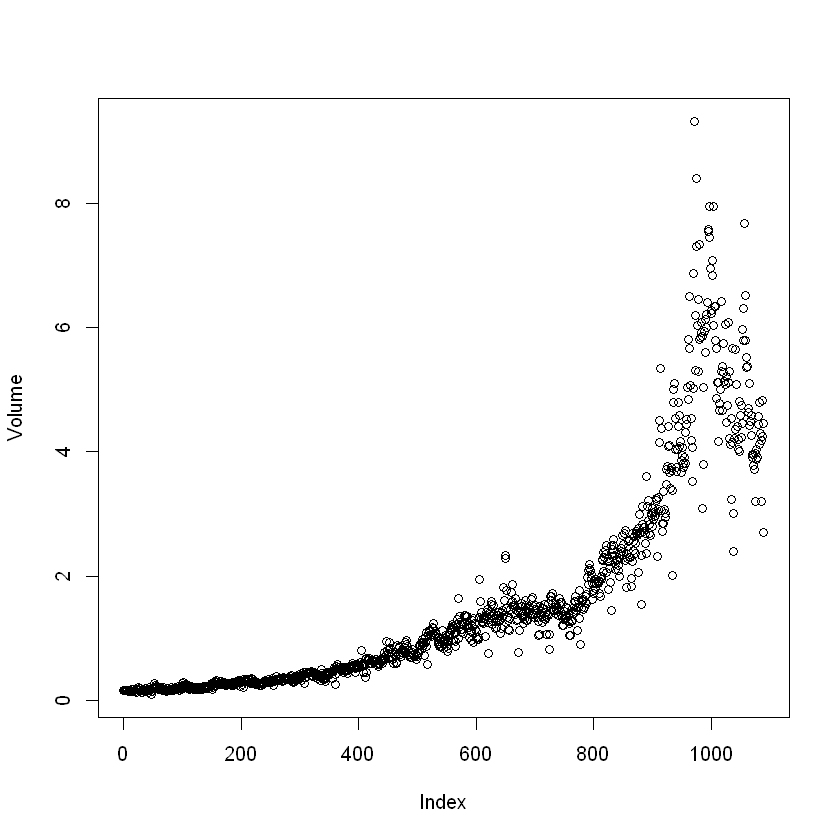

In [25]:
attach(Weekly)
plot(Volume)

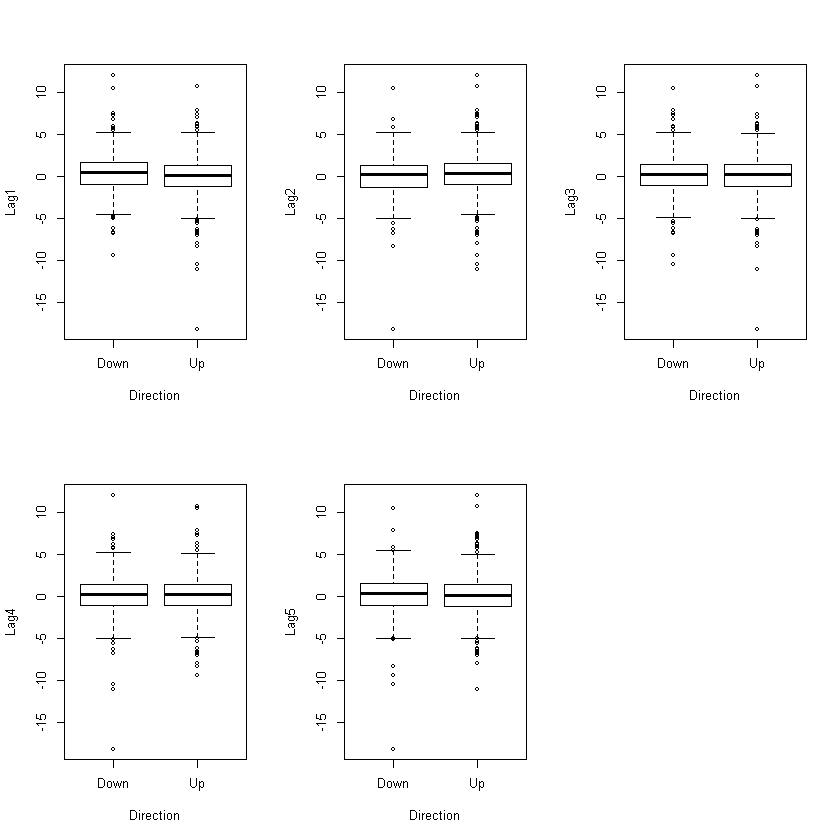

In [26]:
par(mfrow=c(2,3))
plot(Direction, Lag1, xlab="Direction", ylab ="Lag1")
plot(Direction, Lag2, xlab="Direction", ylab ="Lag2")
plot(Direction, Lag3, xlab="Direction", ylab ="Lag3")
plot(Direction, Lag4, xlab="Direction", ylab ="Lag4")
plot(Direction, Lag5, xlab="Direction", ylab ="Lag5")

There do not seem to be any strong relationships between any of the lag variables and whether 
the stock market moves up or down.

In [27]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2 appears to be statistically significant.

In [28]:
glm.probs=predict(glm.fit, type="response")
glm.pred=rep("Down",1089)
glm.pred[glm.probs>.5]="Up"
table(glm.pred,Direction)
mean(glm.pred==Direction)

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

[1] 0.5610652

The model prediction was right 56% of the time. 
430 times the model predicted an up movement but a down movement occurred.
48 times the model predicted a down movement but an up movement occurred. 

In [29]:
train=(Year<2009)
Weekly.Test=Weekly[!train,]
dim(Weekly.Test)
Direction.Test=Direction[!train]

[1] 104   9

In [30]:
glm.fit=glm(Direction~Lag2, data=Weekly, family=binomial, subset=train)
glm.probs=predict(glm.fit, Weekly.Test, type="response")
glm.pred=rep("Down", 104)
glm.pred[glm.probs>.5]="Up"
table(glm.pred, Direction.Test)
mean(glm.pred==Direction.Test)
mean(glm.pred!=Direction.Test)

        Direction.Test
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

[1] 0.375

The overall fraction of correct predictions for the held out data is 62.5%.

In [31]:
lda.fit=lda(Direction~Lag2, data=Weekly, subset=train)
lda.pred=predict(lda.fit, Weekly.Test)
lda.class=lda.pred$class
table(lda.class, Direction.Test)
mean(lda.class==Direction.Test)
mean(lda.class!=Direction.Test)

         Direction.Test
lda.class Down Up
     Down    9  5
     Up     34 56

[1] 0.625

[1] 0.375

In [32]:
qda.fit=qda(Direction~Lag2, data=Weekly, subset=train)
qda.pred=predict(qda.fit, Weekly.Test)
qda.class=qda.pred$class
table(qda.class, Direction.Test)
mean(qda.class==Direction.Test)
mean(qda.class!=Direction.Test)

         Direction.Test
qda.class Down Up
     Down    0  0
     Up     43 61

[1] 0.5865385

[1] 0.4134615

In [33]:
library(class)
#need matrix function because knn wants a matrix not a vector for train and test
train.X=matrix(Lag2[train])
test.X=matrix(Lag2[!train])
train.Direction=Direction[train]
set.seed(1)
knn.pred=knn(train.X, test.X, train.Direction, k=1)
table(knn.pred, Direction.Test)
mean(knn.pred==Direction.Test)
mean(knn.pred!=Direction.Test)

        Direction.Test
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

[1] 0.5

The GLM and LDA methods appear to be a tie for providing the best results on this data.

In [34]:
#try KNN with k=4
set.seed(1)
knn.pred=knn(train.X, test.X, train.Direction, k=4)
table(knn.pred, Direction.Test)
mean(knn.pred==Direction.Test)
mean(knn.pred!=Direction.Test)

        Direction.Test
knn.pred Down Up
    Down   20 17
    Up     23 44

[1] 0.6153846

[1] 0.3846154

In [35]:
#run a glm with a bunch of interactions to see what might be significant
glm.fit=glm(Direction~Lag2 + Lag1*Lag2 + Lag2*Lag3 + Lag3*Lag4 + Lag4*Lag5 + Lag1*Lag3 + Lag2*Lag4 + Lag3*Lag5 + Lag1*Lag4 + Lag2*Lag5 + Lag1*Lag5, data=Weekly, family=binomial, subset=train)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2 + Lag1 * Lag2 + Lag2 * Lag3 + 
    Lag3 * Lag4 + Lag4 * Lag5 + Lag1 * Lag3 + Lag2 * Lag4 + Lag3 * 
    Lag5 + Lag1 * Lag4 + Lag2 * Lag5 + Lag1 * Lag5, family = binomial, 
    data = Weekly, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6158  -1.2497   0.9713   1.0851   1.6551  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.229802   0.066201   3.471 0.000518 ***
Lag2         0.053846   0.032205   1.672 0.094528 .  
Lag1        -0.050700   0.032150  -1.577 0.114796    
Lag3        -0.005391   0.032478  -0.166 0.868173    
Lag4        -0.031425   0.032311  -0.973 0.330768    
Lag5        -0.024330   0.031426  -0.774 0.438806    
Lag2:Lag1    0.003390   0.009188   0.369 0.712156    
Lag2:Lag3    0.001947   0.008439   0.231 0.817537    
Lag3:Lag4    0.014741   0.008921   1.652 0.098472 .  
Lag4:Lag5   -0.007635   0.009326  -0.819 0.412989    
Lag1:Lag3    0.006535   0.011337 

In [36]:
#try lag3 and lag4
glm.fit=glm(Direction~Lag2 + Lag3:Lag4, data=Weekly, family=binomial, subset=train)
glm.probs=predict(glm.fit, Weekly.Test, type="response")
glm.pred=rep("Down", 104)
glm.pred[glm.probs>.5]="Up"
table(glm.pred, Direction.Test)
mean(glm.pred==Direction.Test)
mean(glm.pred!=Direction.Test)

        Direction.Test
glm.pred Down Up
    Down   10  3
    Up     33 58

[1] 0.6538462

[1] 0.3461538

In [37]:
#try lag2 and lag3 interaction
lda.fit=lda(Direction~Lag2 + Lag3:Lag4, data=Weekly, subset=train)
lda.pred=predict(lda.fit, Weekly.Test)
lda.class=lda.pred$class
table(lda.class, Direction.Test)
mean(lda.class==Direction.Test)
mean(lda.class!=Direction.Test)

         Direction.Test
lda.class Down Up
     Down   10  3
     Up     33 58

[1] 0.6538462

[1] 0.3461538

In [38]:
#try lag3 and lag4 and volume squared
glm.fit=glm(Direction~Lag2 + Lag3*Lag4 + I(Volume^2), data=Weekly, family=binomial, subset=train)
glm.probs=predict(glm.fit, Weekly.Test, type="response")
glm.pred=rep("Down", 104)
glm.pred[glm.probs>.5]="Up"
table(glm.pred, Direction.Test)
mean(glm.pred==Direction.Test)
mean(glm.pred!=Direction.Test)

        Direction.Test
glm.pred Down Up
    Down   17 20
    Up     26 41

[1] 0.5576923

[1] 0.4423077

The best method appears to be a tie: GLM or LDA with an added interaction of Lag3 and Lag4. 